Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.
•	Построить график Precision - Recall на этих же данных


In [ ]:
Строим логистическую регрессию - угадываем доход человека

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv( 'adult.csv' , na_values='?' ) #не заполненные значения в виде ? сразу преобразуем в NA)
data.head(10)
        

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df=data[['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
         'capital-gain', 'capital-loss', 'native-country', 'income']] #Оставляем колонки по которым будем делать предсказание 
# и результирующий класс
df=df.dropna() #удаляем NA, чтобы убрать их влияние на предсказание

In [7]:
df.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,capital-gain,capital-loss,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,0,0,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,0,0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,0,0,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,7688,0,United-States,>50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,0,0,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,3103,0,United-States,>50K
8,24,Private,Some-college,Never-married,Other-service,Unmarried,White,Female,40,0,0,United-States,<=50K
9,55,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,10,0,0,United-States,<=50K
10,65,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,6418,0,United-States,>50K
11,36,Federal-gov,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,0,0,United-States,<=50K


In [8]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split

In [18]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = df[ [ 'age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
         'capital-gain', 'capital-loss', 'native-country', 'income']]
# столбецы с  категориальной переменной
# переведем  в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies( selectedColumns, columns = [ 'workclass', 'education','marital-status', 'occupation',
                                                'relationship', 'race', 'gender', 'native-country' ] )

# столбец 'income' является целевой переменной, удаляем его из X
del X['income']
X.head()

,age,hours-per-week,capital-gain,capital-loss,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,50,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,40,7688,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,30,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:

# целевая переменная (столбец 'income') снова является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
le.fit( df['income'] )

LabelEncoder()

In [21]:
# записываем в переменную y преобразованный столбец 

y = pd.Series(data = le.transform( df['income'] ) )
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [12]:
model = LogisticRegression(max_iter=1000)

In [22]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state = 100)
model.fit( X_train, y_train )


LogisticRegression(max_iter=1000)

In [ ]:
# Получаем прогнозные значения модели (переменная predictions)

In [23]:
predictions = model.predict_proba(X_test)

In [24]:
model.score(X_test, y_test)

0.8491928945234761

Используем готовые библиотеки

In [26]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [28]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )

In [30]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.26280344557556773, 1.0, 0.0027983115360371608)
(0.2627457122719085, 0.9997020262216925, 0.002799204280843629)
(0.26276629072681706, 0.9997020262216925, 0.002807086803617674)
(0.2627868724054202, 0.9997020262216925, 0.0028076053433691494)
(0.26280745730847566, 0.9997020262216925, 0.0028087699610826566)
(0.2628280454367411, 0.9997020262216925, 0.0028214725619240774)
(0.26284863679097464, 0.9997020262216925, 0.002824435053517693)
(0.2628692313719345, 0.9997020262216925, 0.002827052597794028)
(0.26288982918037923, 0.9997020262216925, 0.002827351022502066)
(0.2629104302170676, 0.9997020262216925, 0.0028291742135288737)
(0.2629310344827586, 0.9997020262216925, 0.00283538457888141)
(0.26295164197821147, 0.9997020262216925, 0.0028457488108752124)
(0.2629722527041856, 0.9997020262216925, 0.0028457649661071)
(0.2629928666614408, 0.9997020262216925, 0.0028463284249553443)
(0.2630134838507369, 0.9997020262216925, 0.0028509996864364224)
(0.2630341042728342, 0.9997020262216925, 0.0028512841765518

(0.29473869435157485, 0.9982121573301549, 0.008964931328022806)
(0.2948165097245446, 0.9982121573301549, 0.008970944008868985)
(0.29484245731385317, 0.9982121573301549, 0.00897507108497063)
(0.2948684094709973, 0.9982121573301549, 0.00898974666339687)
(0.2948943661971831, 0.9982121573301549, 0.0089898077257184)
(0.2949203274936174, 0.9982121573301549, 0.008997354505818447)
(0.2949462933615073, 0.9982121573301549, 0.009000371434923448)
(0.29497226380206043, 0.9982121573301549, 0.009021130802416578)
(0.2949982388164847, 0.9982121573301549, 0.009043301634384814)
(0.2950502025717809, 0.9982121573301549, 0.009052781257890028)
(0.2950761913150709, 0.9982121573301549, 0.009067320373145208)
(0.29510218463706833, 0.9982121573301549, 0.00907606507644713)
(0.2951281825389834, 0.9982121573301549, 0.009080689746530606)
(0.29515418502202645, 0.9982121573301549, 0.009085617742278748)
(0.2951801920874086, 0.9982121573301549, 0.009088006077913716)
(0.2952062037363412, 0.9982121573301549, 0.009089146374

(0.3249100981630868, 0.9961263408820024, 0.017637675493765555)
(0.32494167962674964, 0.9961263408820024, 0.017642103331112748)
(0.3249732672304851, 0.9961263408820024, 0.01765204023338082)
(0.325004860976084, 0.9961263408820024, 0.01765670699225306)
(0.3250364608653379, 0.9961263408820024, 0.01766856641670295)
(0.32509967908197995, 0.9961263408820024, 0.01767364466536633)
(0.32513129741295466, 0.9961263408820024, 0.017682851620561327)
(0.3251629218947573, 0.9961263408820024, 0.017684860120910615)
(0.3251945525291829, 0.9961263408820024, 0.01769225901866)
(0.32522618931802705, 0.9961263408820024, 0.01771744638631798)
(0.3252578322630862, 0.9961263408820024, 0.017725563070933988)
(0.32528948136615743, 0.9961263408820024, 0.017726181862974276)
(0.32532113662903855, 0.9961263408820024, 0.017747503477520726)
(0.32535279805352796, 0.9961263408820024, 0.017756796375874573)
(0.325384465641425, 0.9961263408820024, 0.017769800043939674)
(0.32541613939452935, 0.9961263408820024, 0.017771355895748

(0.36831595296205905, 0.9892729439809297, 0.03440620846176216)
(0.3683568179296572, 0.9892729439809297, 0.034412777860954306)
(0.3683976919662672, 0.9892729439809297, 0.03442567132848209)
(0.36843857507490846, 0.9892729439809297, 0.03442918699709035)
(0.36847946725860153, 0.9892729439809297, 0.03443102478946685)
(0.3685203685203685, 0.9892729439809297, 0.03443351453143804)
(0.3685612788632327, 0.9892729439809297, 0.034449785378605775)
(0.36860219829021873, 0.9892729439809297, 0.034469581551435646)
(0.3686431268043526, 0.9892729439809297, 0.03447190833396816)
(0.36868406440866186, 0.9892729439809297, 0.03449562466619379)
(0.36872501110617506, 0.9892729439809297, 0.03453906321969475)
(0.36876596689992225, 0.9892729439809297, 0.03454961999138727)
(0.3688069317929349, 0.9892729439809297, 0.03457319750992258)
(0.3688479057882458, 0.9892729439809297, 0.03458374806989639)
(0.3688888888888889, 0.9892729439809297, 0.03461500180226)
(0.36892988109789976, 0.9892729439809297, 0.034653849842194724)

(0.4166666666666667, 0.9728843861740167, 0.0655390227248517)
(0.41671984684109764, 0.9728843861740167, 0.06554766481110189)
(0.41677304059229003, 0.9728843861740167, 0.06556176991517203)
(0.41682624792544365, 0.9728843861740167, 0.06556445714340836)
(0.416879468845761, 0.9728843861740167, 0.06562362901156077)
(0.4169327033584472, 0.9728843861740167, 0.0656475579761721)
(0.4169859514687101, 0.9728843861740167, 0.0657279125752512)
(0.4170392131817601, 0.9728843861740167, 0.06579076976560422)
(0.41709248850281044, 0.9728843861740167, 0.06584378492757484)
(0.41714577743707676, 0.9728843861740167, 0.06585997055531935)
(0.4171990799897777, 0.9728843861740167, 0.06589084371695089)
(0.41712460063897766, 0.9725864123957092, 0.06596637194204616)
(0.4171779141104294, 0.9725864123957092, 0.06598097548073488)
(0.4172312412118113, 0.9725864123957092, 0.06599494807221754)
(0.41728458194835083, 0.9725864123957092, 0.06599995951208987)
(0.4173379363252781, 0.9725864123957092, 0.06601864983565013)
(0.41

(0.4746759119686464, 0.9383194278903456, 0.12090722546741405)
(0.47474747474747475, 0.9383194278903456, 0.12093172711192517)
(0.4746682750301568, 0.9380214541120382, 0.12095763737671017)
(0.47473985824159254, 0.9380214541120382, 0.12100294405384882)
(0.47481146304675714, 0.9380214541120382, 0.1210052643682983)
(0.4748830894554231, 0.9380214541120382, 0.12104920654249433)
(0.4749547374773687, 0.9380214541120382, 0.1211290418697043)
(0.47502640712237815, 0.9380214541120382, 0.12117130228109649)
(0.4750980984002415, 0.9380214541120382, 0.1211750990325229)
(0.4751698113207547, 0.9380214541120382, 0.12131021152223999)
(0.4750905797101449, 0.9377234803337307, 0.12132543430015749)
(0.47516231315114, 0.9377234803337307, 0.1213263061440157)
(0.47523406825732406, 0.9377234803337307, 0.12133652024012952)
(0.4753058450385138, 0.9377234803337307, 0.12137747243585173)
(0.4753776435045317, 0.9377234803337307, 0.12138758016715537)
(0.47544946366520624, 0.9377234803337307, 0.1214166203356066)
(0.475370

(0.5346516690856313, 0.8781287246722288, 0.1991590740014298)
(0.5347486844492833, 0.8781287246722288, 0.19923331657348148)
(0.5348457350272232, 0.8781287246722288, 0.1992415357745489)
(0.5347612996914141, 0.8778307508939214, 0.1993896594348063)
(0.5348583877995643, 0.8778307508939214, 0.19941126435875814)
(0.5349555111676049, 0.8778307508939214, 0.19942146391343799)
(0.5350526698147475, 0.8778307508939214, 0.19946083780746487)
(0.535149863760218, 0.8778307508939214, 0.1995100483644531)
(0.5352470930232558, 0.8778307508939214, 0.19973417155383844)
(0.535162638560785, 0.8775327771156138, 0.19977561592577214)
(0.5352599054889131, 0.8775327771156138, 0.1998189709369201)
(0.5353572077804035, 0.8775327771156138, 0.19983657888962936)
(0.5352727272727272, 0.8772348033373063, 0.19999873357529394)
(0.535370067284961, 0.8772348033373063, 0.2000388616875656)
(0.5354674427064388, 0.8772348033373063, 0.20011475455226257)
(0.5353829361469893, 0.8769368295589988, 0.20019151550848363)
(0.53548034934497

(0.6237623762376238, 0.7696662693682956, 0.31927580758510105)
(0.6239130434782608, 0.7696662693682956, 0.319631256703676)
(0.62406378352259, 0.7696662693682956, 0.3197170743039359)
(0.6242145964233929, 0.7696662693682956, 0.31994686187645127)
(0.6243654822335025, 0.7696662693682956, 0.3199879139767125)
(0.624274661508704, 0.7693682955899881, 0.32004299282339155)
(0.6244256348246675, 0.7693682955899881, 0.3201009868373271)
(0.6245766811804547, 0.7693682955899881, 0.3201098206103517)
(0.624727800629083, 0.7693682955899881, 0.3201887163471177)
(0.6248789932236205, 0.7693682955899881, 0.3203300708260653)
(0.6250302590171871, 0.7693682955899881, 0.3203638296376795)
(0.625181598062954, 0.7693682955899881, 0.32038070235719546)
(0.6250908210220393, 0.7690703218116806, 0.3206645207340143)
(0.6252422480620154, 0.7690703218116806, 0.32076978925005645)
(0.6250605913717887, 0.7684743742550656, 0.320863325107072)
(0.624969696969697, 0.7681764004767581, 0.32141313795880283)
(0.6248787584869059, 0.767

(0.7157964309319234, 0.6454112038140644, 0.4610652118337457)
(0.7160330578512397, 0.6454112038140644, 0.461147023860839)
(0.7162698412698413, 0.6454112038140644, 0.4613166532566394)
(0.7169811320754716, 0.6454112038140644, 0.4613778662508399)
(0.7172185430463576, 0.6454112038140644, 0.4614012766352238)
(0.7172688100762347, 0.6448152562574494, 0.46151330434216925)
(0.7171750663129973, 0.6445172824791419, 0.46153356071448737)
(0.7174129353233831, 0.6445172824791419, 0.461547507828601)
(0.7173191771731918, 0.6442193087008343, 0.4616201956293106)
(0.7177954847277557, 0.6442193087008343, 0.4616829530333712)
(0.7177017602125539, 0.6439213349225268, 0.46174508284573174)
(0.717607973421927, 0.6436233611442194, 0.4617745766316435)
(0.7178464606181456, 0.6436233611442194, 0.4618805362957096)
(0.7179913535084802, 0.6433253873659118, 0.4618910977619516)
(0.7182302062541583, 0.6433253873659118, 0.46197589737471695)
(0.7181364392678868, 0.6430274135876043, 0.4620707957579435)
(0.7180426098535286, 0.

(0.7877647058823529, 0.49880810488676997, 0.6032770962131375)
(0.7879359095193214, 0.49821215733015495, 0.603336594590449)
(0.7878359264497878, 0.4979141835518474, 0.6033585930580131)
(0.7875354107648725, 0.4970202622169249, 0.6033745881283146)
(0.7878071833648393, 0.4967222884386174, 0.603983919781447)
(0.7877068557919622, 0.4964243146603099, 0.6041308611227677)
(0.7880794701986755, 0.4964243146603099, 0.6042052766276871)
(0.7884524372929484, 0.4964243146603099, 0.6044493373584269)
(0.7888257575757576, 0.4964243146603099, 0.6045242171482176)
(0.7887257224064425, 0.49612634088200236, 0.6048921127074073)
(0.7886255924170616, 0.4958283671036949, 0.6053419956138906)
(0.7889995258416311, 0.4958283671036949, 0.6054130013486198)
(0.7893738140417458, 0.4958283671036949, 0.6058090255800639)
(0.7892738490745135, 0.49553039332538734, 0.6062640283296915)
(0.7891737891737892, 0.49523241954707986, 0.6064215233922692)
(0.7890736342042756, 0.4949344457687723, 0.6066162864425215)
(0.7894486692015209, 

(0.8827586206896552, 0.266984505363528, 0.774837061901201)
(0.8826429980276134, 0.2666865315852205, 0.7755574119804618)
(0.8825271470878578, 0.266388557806913, 0.7757064727615046)
(0.8824110671936759, 0.26609058402860547, 0.7758171827930417)
(0.8832838773491593, 0.26609058402860547, 0.7763669746241245)
(0.8831683168316832, 0.265792610250298, 0.7767377257758794)
(0.8830525272547076, 0.26549463647199045, 0.7767967731754521)
(0.8829365079365079, 0.26519666269368297, 0.7768450831681166)
(0.8828202581926514, 0.26489868891537544, 0.7768678158038569)
(0.8836978131212724, 0.26489868891537544, 0.7769139982975052)
(0.8835820895522388, 0.26460071513706795, 0.7770528024092456)
(0.8834661354581673, 0.2643027413587604, 0.7772287225390114)
(0.8843469591226321, 0.2643027413587604, 0.7774495182513036)
(0.8842315369261478, 0.26400476758045294, 0.777592715236503)
(0.8841158841158842, 0.2637067938021454, 0.7778217484567728)
(0.885, 0.2637067938021454, 0.7779657078096359)
(0.8848848848848849, 0.26340882002

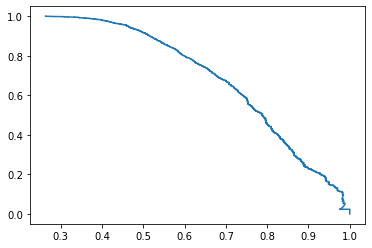

In [44]:
plt.plot( pr, re )

In [31]:
from sklearn.metrics import average_precision_score

In [33]:
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

0.7606835666530385

# ROC 

In [35]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [37]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [38]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.9999999999999996)
(0.0, 0.0002979737783075089, 0.9999999999999996)
(0.0, 0.0005959475566150178, 0.9999999999999993)
(0.0, 0.0032777115613825984, 0.9999999999999987)
(0.0, 0.004767580452920143, 0.9999999999999984)
(0.0, 0.0059594755661501785, 0.9999999999999982)
(0.0, 0.008939213349225268, 0.999999999999998)
(0.0, 0.010727056019070322, 0.9999999999999978)
(0.0, 0.01132300357568534, 0.9999999999999976)
(0.0, 0.012514898688915376, 0.9999999999999973)
(0.0, 0.013110846245530394, 0.9999999999999967)
(0.0, 0.013706793802145411, 0.9999999999999964)
(0.0, 0.014600715137067939, 0.9999999999999962)
(0.0, 0.023539928486293205, 0.9999999999988969)
(0.0001958672020370189, 0.023539928486293205, 0.9999160458801045)
(0.0001958672020370189, 0.04201430274135876, 0.9975900641593619)
(0.0001958672020370189, 0.04261025029797378, 0.9975543356006484)
(0.0001958672020370189, 0.04439809296781883, 0.9973442469902041)
(0.0001958672020370189, 0.04499404052443385, 0.997297401644465)
(0.000195867202037

(0.11781412202526687, 0.716030989272944, 0.37553626865987705)
(0.11791205562628537, 0.716030989272944, 0.3755221178174117)
(0.11791205562628537, 0.7163289630512515, 0.375469020832251)
(0.1181079228283224, 0.7163289630512515, 0.3754481122300689)
(0.1181079228283224, 0.7169249106078666, 0.37537765313835364)
(0.11820585642934091, 0.7169249106078666, 0.3753051047374408)
(0.11820585642934091, 0.717222884386174, 0.3752894349029173)
(0.11849965723239643, 0.717222884386174, 0.37503704681190714)
(0.11849965723239643, 0.7178188319427891, 0.37483817742332126)
(0.11869552443443346, 0.7178188319427891, 0.37462051875614627)
(0.11869552443443346, 0.7181168057210966, 0.37461762887044103)
(0.11879345803545197, 0.7181168057210966, 0.3745053854819718)
(0.11879345803545197, 0.718414779499404, 0.37449284658461507)
(0.11898932523748898, 0.718414779499404, 0.3743997923542611)
(0.11918519243952601, 0.718414779499404, 0.3743651918775672)
(0.11918519243952601, 0.7187127532777116, 0.37434080857096214)
(0.1192831

(0.2857702477720106, 0.9067342073897497, 0.1654541684193219)
(0.2859661149740476, 0.9067342073897497, 0.1653118683447101)
(0.2859661149740476, 0.9070321811680572, 0.16529086362382428)
(0.28616198217608463, 0.9070321811680572, 0.1651134266188189)
(0.28635784937812164, 0.9073301549463647, 0.16508385493320132)
(0.28635784937812164, 0.9076281287246722, 0.16493367578263238)
(0.28665165018117716, 0.9076281287246722, 0.16453176542326245)
(0.28665165018117716, 0.9079261025029798, 0.16444336086821695)
(0.2869454509842327, 0.9079261025029798, 0.16391536243732538)
(0.2869454509842327, 0.9082240762812872, 0.1635195163371098)
(0.2870433845852512, 0.9082240762812872, 0.16351361738418074)
(0.2874351189893252, 0.9082240762812872, 0.16345563623184128)
(0.28812065419645483, 0.9082240762812872, 0.16293335749219784)
(0.28812065419645483, 0.9085220500595947, 0.16292365186747465)
(0.28851238860052886, 0.9085220500595947, 0.16288243868217733)
(0.28861032220154736, 0.9085220500595947, 0.16284266680596998)
(0.

(0.9308588776809323, 1.0, 0.002548467741973245)
(0.9311526784839879, 1.0, 0.0025472229696892655)
(0.9317402800900989, 1.0, 0.0025300239271814243)
(0.9321320144941729, 1.0, 0.002523509665520745)
(0.9342865537165802, 1.0, 0.002432864219610885)
(0.9344824209186172, 1.0, 0.002430239316817783)
(0.9403584369797278, 1.0, 0.002243799297527417)
(0.9406522377827833, 1.0, 0.002239723838414357)
(0.9433943786113015, 1.0, 0.002150133284944657)
(0.9435902458133385, 1.0, 0.0021485493951499224)
(0.9441778474194497, 1.0, 0.0021275880356952594)
(0.9443737146214867, 1.0, 0.0021241910582119506)
(0.9449613162275977, 1.0, 0.0021059120109309026)
(0.9451571834296347, 1.0, 0.0021043606279182708)
(0.9465282538438938, 1.0, 0.0020738188674364385)
(0.9467241210459308, 1.0, 0.0020702062313824265)
(0.9508373322887083, 1.0, 0.0019471964471433486)
(0.9510331994907453, 1.0, 0.0019357495511275406)
(0.9520125355009303, 1.0, 0.0018980543336980956)
(0.9522084027029674, 1.0, 0.001897687767524383)
(0.9523063363039859, 1.0, 0.

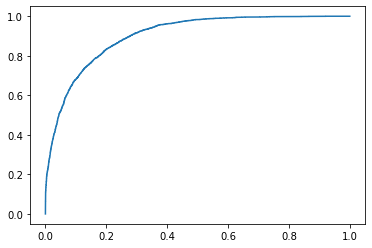

In [47]:
plt.plot( fpr, tpr )

In [48]:
# площадь под кривой

In [50]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score( y_test, predictions[:, 1] )

0.9021237263233264

In [ ]:
# Считаем accuracy в ручную

In [54]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [55]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.8491928945234761

In [56]:
precision = tp / (tp + fp)
precision

0.7371469949312093